<a href="https://colab.research.google.com/github/Becky-Kwon/2022_cau_oss_hackathon/blob/main/hackathon_team09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. 해커톤 진행 주의사항**

**1)  개발 관련 주의사항**
*   [1. 초기 환경 설정]은 절대 수정하지 말 것
*   모든 구현은 [2. 데이터 전처리] 및 [3.모델 생성]에서만 진행
*   [4. 모델 저장]에서 team_name 변수 변경 (예.`team_name = 'team01'`)
 *    트레이닝 중간에 checkpoint를 활용하여 모델을 저장한 경우에도 파일 이름 양식 통일 필수
*   Colab 사용중 실수로 데이터 손실이 발생할 수도 있으니 중간 결과값을 github에 업로드 
 *    "런타임 -> 런타임 연결 해제 및 삭제"은 절대 누르지 말 것 (저장한 모델 데이터가 모두 삭제됨)
 *    "런타임 -> 런타임 다시시작"은 클라우드 스토리지에 저장된 모델은 유지됨
*   효율적인 구현 및 테스팅을 위해 GPU 가속 기능 활성화
 *    "런타임 -> 런타임 유형변경 -> 하드웨어 가속기 -> GPU 설정"
*   주석을 최대한 자세히 작성
*   Keras API 관련하여 [Keras Documentation](https://keras.io/) 참조

**2) 제출 관련 주의사항**
*  제출물
 *  소스코드 (hackathon_teamXX.ipynb)
 *  컴파일된 모델 파일 (model_entire_teamXX.h5)
 *  모델 발표 자료 
* 제출 기한: **오후 6시 (단, 발표자료는 12시)**
* 제출 방법: [GitHub README](https://github.com/cauosshackathonta/2022_cau_oss_hackathon/) 참조

 
**3) 평가 관련 주의사항**
*  모델 성능 = 테스트 데이터 셋 분류 정확도
 *  model.evaluate(x_test, y_test)
*  제출된 모델들의 테스트 데이터 셋 분류 정확도를 기준으로 수상작 결정
*  수상 후보들에 대해서는 소스코드를 기반으로 모델 재검증 
 
**4) 수상 실격 사유**
*  유사한 소스코드가 적발될 경우
*  Pre-trained 모델을 사용한 경우 (transfer learning 포함)
*  소스코드와 제출된 모델이 상이한 경우
*  개발 관련 주의사항을 지키지 않은 경우
 *  예: [초기 환경 설정]을 수정한 경우
*  데이터 셋을 변조한 경우
 *  예. 테스트 데이터 셋을 트레이닝 데이터 셋에 포함하여 모델 생성 
*  주석이 소스코드와 맞지 않거나 미비할 경우






# **1. 초기 환경 설정**



In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras 및 관련 라이브러리 임포트
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

from tensorflow import keras
from keras.utils import np_utils
from keras import datasets, layers, models

# 데이터셋 로드 (MNIST, fashion-MNIST, Kujushiji-MNIST, MNIST_corrupted (test only))
train_ds, test_ds = tfds.load('mnist', split=['train', 'test'], shuffle_files=False, batch_size=-1)

train_ds2, test_ds2 = tfds.load('fashion_mnist', split=['train', 'test'], shuffle_files=False, batch_size=-1)
train_ds2['label'] += 10;
test_ds2['label'] += 10;

train_ds3, test_ds3 = tfds.load('kmnist', split=['train', 'test'], shuffle_files=False, batch_size=-1)
train_ds3['label'] += 20;
test_ds3['label'] += 20;

test_ds4 = tfds.load('mnist_corrupted/zigzag', split='test', shuffle_files=False, batch_size=-1)

# 데이터셋 병합 (training: 180,000개, test: 40,000개)
x_train = np.append(np.append(train_ds['image'], train_ds2['image'], 0), train_ds3['image'], 0);
y_train = np.append(np.append(train_ds['label'], train_ds2['label'], 0), train_ds3['label'], 0);

x_test = np.append(np.append(np.append(test_ds['image'], test_ds2['image'], 0), test_ds3['image'], 0), test_ds4['image'], 0);
y_test = np.append(np.append(np.append(test_ds['label'], test_ds2['label'], 0), test_ds3['label'], 0), test_ds4['label'], 0);

# 분류를 위해 클래스 벡터를 바이너리 매트릭스로 변환
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 총 클래스 개수: 30, 입력 데이터 구조: (28, 28, 1)
num_classes = y_train.shape[1]
input_shape = x_train.shape[1:]
print(num_classes, input_shape)

Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incompleteLOV8ZX/fashion_mnist-train.tfrecord*...:   0%|  …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incompleteLOV8ZX/fashion_mnist-test.tfrecord*...:   0%|   …

Dataset fashion_mnist downloaded and prepared to ~/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/kmnist/3.0.1.incomplete7JSKB5/kmnist-train.tfrecord*...:   0%|          | 0/60…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/kmnist/3.0.1.incomplete7JSKB5/kmnist-test.tfrecord*...:   0%|          | 0/100…

Dataset kmnist downloaded and prepared to ~/tensorflow_datasets/kmnist/3.0.1. Subsequent calls will reuse this data.


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/mnist_corrupted/zigzag/1.0.0.incomplete1GZGEY/mnist_corrupted-train.tfrecord*.…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/mnist_corrupted/zigzag/1.0.0.incomplete1GZGEY/mnist_corrupted-test.tfrecord*..…

Dataset mnist_corrupted downloaded and prepared to ~/tensorflow_datasets/mnist_corrupted/zigzag/1.0.0. Subsequent calls will reuse this data.
30 (28, 28, 1)


# **2. 데이터 전처리**



#### 데이터 정리
1) MNIST(손글씨-번호분류)  
train = 60000 (28,28,1)   
test = 10000 (28,28,1)   
전체 `0~9`까지 9개의 번호를 분류하는 것


2) fashion-MNIST  
train = 60000 (28,28,1)   
test = 10000 (28,28,1)  
전체 label 구성은 `{ 0:티셔츠/탑, 1:바지, 2:풀오버(스웨터의 일종), 3:드레스, 4:코트, 5:샌들, 6:셔츠, 7:스니커즈, 8:가방, 9:앵클 부츠 }`
  
3) Kujushiji-MNIST
train = 60000 (28,28,1)   
test = 10000 (28,28,1) 
전체 label 구성은 10 개의 히라가나 손글씨


4) MNIST_corrupted
test = 10000 (28,28,1)   
변형된 손글씨 데이터...

In [ ]:
import matplotlib.pylab as plt

In [ ]:
def visual(num):
  image = x_test[num]
  image_reshaped = image.reshape(28, 28)
  image_reshaped.shape
  label = y_test[num].argmax()
  plt.figure(figsize = (4, 4))
  plt.title("sample of " + str(label))
  plt.imshow(image_reshaped, cmap="gray")

In [ ]:
x_train.shape

(180000, 28, 28, 1)

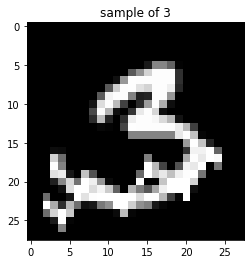

In [ ]:
visual(36000)

In [2]:
# 데이터 전처리 (예: normalization)
# 원본 데이터와 전처리 후 데이터를 구분하기 위해, 변수명 x_train_after, x_test_after를 변경하지 말 것
x_train_after = x_train / 255
x_test_after = x_test / 255

# **3. 모델 생성**

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,MaxPooling2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models, losses, Model

In [4]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(180000, 28, 28, 1) (180000, 30) (40000, 28, 28, 1) (40000, 30)


In [5]:
def identity_block(X, filters, kernel_size):
    X_shortcut = X
    
    X = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)
    X = tf.keras.layers.Activation('relu')(X)
    
    X = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)
    X = tf.keras.layers.Activation('relu')(X)
    
    X = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)
    
    # Add
    X = tf.keras.layers.Add()([X, X_shortcut])
    X = tf.keras.layers.Activation('relu')(X)
    
    return X

In [6]:
def convolutional_block(X, filters, kernel_size):
    X_shortcut = X
    
    X = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)
    X = tf.keras.layers.Activation('relu')(X)
    
    X = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)
    X = tf.keras.layers.Activation('relu')(X)
    
    X = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization()(X)

    X_shortcut = tf.keras.layers.Conv2D(filters, kernel_size, padding='SAME')(X_shortcut)
    X_shortcut = tf.keras.layers.BatchNormalization()(X_shortcut)
    
    # Add
    X = tf.keras.layers.Add()([X, X_shortcut])
    X = tf.keras.layers.Activation('relu')(X)
    
    return X

In [7]:
def ResNet50CL(input_shape = (28, 28, 1), classes = 30):
    X_input = tf.keras.layers.Input(input_shape)
    X = X_input
    
    X = convolutional_block(X, 64, (3,3)) #conv
    X = identity_block(X, 64, (3,3))
    X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)
    
    X = convolutional_block(X, 128, (3,3)) #64->128, use conv block
    X = identity_block(X, 128, (3,3))
    X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)
    
    X = convolutional_block(X, 256, (3,3)) #128->256, use conv block
    X = identity_block(X, 256, (3,3))
    X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)
    
    X = convolutional_block(X, 512, (3,3)) #256->512, use conv block
    X = identity_block(X, 512, (3,3))
    X = tf.keras.layers.MaxPooling2D(2, 2, padding='SAME')(X)
    
    X = tf.keras.layers.GlobalAveragePooling2D()(X)
    X = tf.keras.layers.Dense(30, activation = 'softmax')(X) # ouput layer (30 class)

    model = tf.keras.models.Model(inputs = X_input, outputs = X, name = "ResNet50CL")
    
    return model

In [8]:
# ResNet50CL

model = ResNet50CL()
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "ResNet50CL"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 28, 28, 64)   640         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 28, 28, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 28, 28, 64)   0           ['batch_normalization[0]

In [10]:
EPOCH = 50
BATCH_SIZE = 128

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                              patience=10, 
                             )

reduceLR = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=4,
)

# 체크포인트 생성
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/checkpoint_entire_best.h5', monitor='val_accuracy', verbose=1, save_weight_only=False, save_best_only=True, mode='auto')

In [11]:
history = model.fit(x_train_after, 
                 y_train, 
                 validation_data=(x_test_after, y_test), 
                 epochs=EPOCH, 
                 batch_size=BATCH_SIZE, 
                 callbacks=[reduceLR, earlystopping, cp_callback],)

Epoch 1/50
1407/1407 [==============================] - ETA: 0s - loss: 0.2567 - accuracy: 0.9196
Epoch 1: val_accuracy improved from -inf to 0.85125, saving model to /content/checkpoint_entire_best.h5
1407/1407 [==============================] - 212s 140ms/step - loss: 0.2567 - accuracy: 0.9196 - val_loss: 0.5736 - val_accuracy: 0.8512 - lr: 0.0010
Epoch 2/50
1407/1407 [==============================] - ETA: 0s - loss: 0.1125 - accuracy: 0.9614
Epoch 2: val_accuracy did not improve from 0.85125
1407/1407 [==============================] - 195s 139ms/step - loss: 0.1125 - accuracy: 0.9614 - val_loss: 0.7762 - val_accuracy: 0.8310 - lr: 0.0010
Epoch 3/50
1407/1407 [==============================] - ETA: 0s - loss: 0.0930 - accuracy: 0.9681
Epoch 3: val_accuracy improved from 0.85125 to 0.87515, saving model to /content/checkpoint_entire_best.h5
1407/1407 [==============================] - 196s 139ms/step - loss: 0.0930 - accuracy: 0.9681 - val_loss: 0.4595 - val_accuracy: 0.8752 - lr: 0

KeyboardInterrupt: ignored

# **4. 모델 저장**

In [12]:
save_path = '/content/'
team_name = 'team09'

# 트레이닝된 전체 모델을 저장합니다.
model.save(save_path +  'model_entire_'+ team_name + '.h5')

# **5. 모델 로드 및 평가**

In [17]:
save_path = '/content/'
team_name = 'team09'

model = keras.models.load_model(save_path + 'model_entire_' + team_name + '.h5')
#model = keras.models.load_model(save_path + "checkpoint_entire_best.h5")
model.evaluate(x_test_after, y_test)

1250/1250 [==============================] - 20s 16ms/step - loss: 0.3952 - accuracy: 0.9134


[0.39516109228134155, 0.9134250283241272]